<a href="https://colab.research.google.com/github/tutalae/TensorFlow/blob/main/TenserFlow_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf

from PIL import Image
from tensorflow.keras.layers import  Dense, Flatten, Conv2D
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [2]:
# import progress bar
from tqdm import  tqdm_notebook

In [23]:
# load dataset
mnist  = tf.keras.datasets.mnist

In [22]:
# split data
(x_train, y_train), (x_test,y_test) = mnist.load_data()

In [24]:
# normalize color
x_train, x_test = x_train / 255.0, x_test /255.0

In [25]:
# add a  chanel dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]


In [7]:
# check shape
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_test.shape

(10000, 28, 28, 1)

In [26]:
# load data to batch , seed 10000
train_dataset = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)


In [27]:
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [28]:
#Define Convolutional neural networks
class yumyum(Model):
  def __init__(self):
    super(yumyum, self).__init__()
    self.conv1 = Conv2D(32 ,3, activation='relu')
    self.flatten = Flatten()
    self.dense1 = Dense(128, activation='relu')
    self.outputdense = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.dense1(x)
    return self.outputdense(x)

model = yumyum()



In [29]:
#Compile loss and optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

In [30]:
#Complie metrics
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [31]:
#Training Function
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:

    predictions = model(images, training=True)

    loss = loss_object(labels, predictions)

  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [32]:
# Evaluation Function
@tf.function
def test_step(images, labels):

  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)
  

In [33]:

#Training cycle

train_accuracy_ls = []
train_loss_ls = []
test_loss_ls = []
test_accuracy_ls = []
EPOCHS  = 10 

for epoch in  range(EPOCHS):

  train_loss.reset_states()

  train_accuracy.reset_states()

  test_loss.reset_states()

  test_accuracy.reset_states()

  for images, labels in train_dataset:
    train_step(images, labels)

  for test_images, test_labels in test_dataset:
    test_step(test_images, test_labels)

  templete = 'Epoch: {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(templete.format(epoch + 1 ,
                        train_loss.result(),
                        train_accuracy.result() *100,
                        test_loss.result(),
                        test_accuracy.result() *100))
  train_accuracy_ls.append(train_accuracy.result() *100)
  train_loss_ls.append(train_loss.result())
  test_accuracy_ls.append(test_accuracy.result() *100)
  test_loss_ls.append(test_loss.result())

Epoch: 1, Loss: 0.13728627562522888, Accuracy: 95.85499572753906, Test Loss: 0.06411530822515488, Test Accuracy: 97.97999572753906
Epoch: 2, Loss: 0.04127933830022812, Accuracy: 98.77333068847656, Test Loss: 0.0562695637345314, Test Accuracy: 98.3499984741211
Epoch: 3, Loss: 0.022684333845973015, Accuracy: 99.2933349609375, Test Loss: 0.055247675627470016, Test Accuracy: 98.3699951171875
Epoch: 4, Loss: 0.011907530948519707, Accuracy: 99.59833526611328, Test Loss: 0.05669272691011429, Test Accuracy: 98.3699951171875
Epoch: 5, Loss: 0.009457272477447987, Accuracy: 99.69499969482422, Test Loss: 0.06411915272474289, Test Accuracy: 98.33999633789062
Epoch: 6, Loss: 0.006594063714146614, Accuracy: 99.78666687011719, Test Loss: 0.07719610631465912, Test Accuracy: 98.22000122070312
Epoch: 7, Loss: 0.006281757261604071, Accuracy: 99.7933349609375, Test Loss: 0.07072052359580994, Test Accuracy: 98.47999572753906
Epoch: 8, Loss: 0.004441435448825359, Accuracy: 99.8616714477539, Test Loss: 0.0751

In [34]:
#Testing result
predict_result = model(x_test, training=False)
#predict_result = tf.nn.softmax(predict_result[1000])

In [35]:
print(" PredictResult {}".format(tf.argmax(predict_result)))
print(" Label: {}".format(y_test[1000]))

 PredictResult [4650 4013 2354 7117 3397 5658  461 4474 1170 1666]
 Label: 9


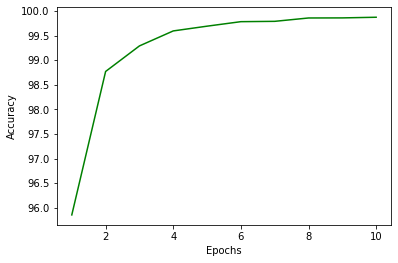

In [36]:
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.plot([1,2,3,4,5,6,7,8,9,10],train_accuracy_ls,c="g")
plt.show()

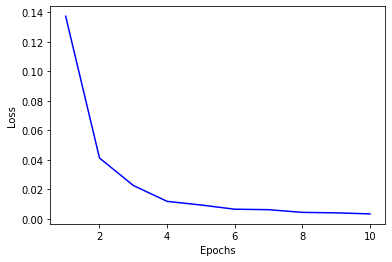

In [37]:
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.plot([1,2,3,4,5,6,7,8,9,10],train_loss_ls,c="b")

plt.show()

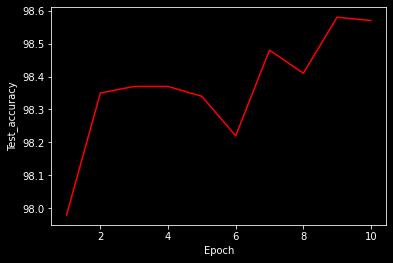

In [38]:

plt.style.use('dark_background') 
plt.ylabel("Test_accuracy")
plt.xlabel("Epoch")
plt.plot([1,2,3,4,5,6,7,8,9,10],test_accuracy_ls,c="r")
plt.show()

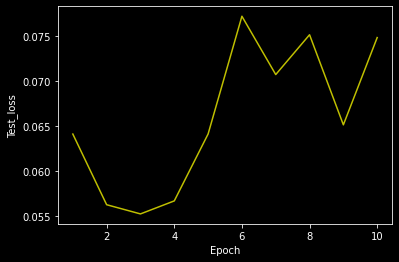

In [40]:

plt.style.use('dark_background') 
plt.ylabel("Test_loss")
plt.xlabel("Epoch")
plt.plot([1,2,3,4,5,6,7,8,9,10],test_loss_ls,c="y")
plt.show()